In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [31]:
contracts = pd.read_csv("data_119/contracts.csv")

In [32]:
contracts.columns.values

array(['contract_award_unique_key', 'obligated_amount',
       'period_of_performance_start_date',
       'period_of_performance_current_end_date', 'funding_agency_name',
       'funding_sub_agency_name', 'recipient_duns', 'recipient_name',
       'primary_place_of_performance_county_name', 'recipient_city_name',
       'award_or_idv_flag', 'award_description',
       'product_or_service_code_description', 'naics_code',
       'naics_description', 'minority_owned_business',
       'black_american_owned_business',
       'hispanic_american_owned_business',
       'federally_funded_research_and_development_corp',
       'us_state_government', 'sole_proprietorship',
       'us_government_entity', 'educational_institution', 'hospital_flag',
       'manufacturer_of_goods', 'limited_liability_corporation',
       'for_profit_organization', 'nonprofit_organization',
       'other_not_for_profit_organization', 'number_of_employees',
       'annual_revenue'], dtype=object)

In [33]:
contracts.head()

,contract_award_unique_key,obligated_amount,period_of_performance_start_date,period_of_performance_current_end_date,funding_agency_name,funding_sub_agency_name,recipient_duns,recipient_name,primary_place_of_performance_county_name,recipient_city_name,...,us_government_entity,educational_institution,hospital_flag,manufacturer_of_goods,limited_liability_corporation,for_profit_organization,nonprofit_organization,other_not_for_profit_organization,number_of_employees,annual_revenue
0,CONT_AWD_00001_8600_DU100G16D01_8600,0.00,4/27/16,1/19/17 0:00,DEPARTMENT OF HOUSING AND URBAN DEVELOPMENT (HUD),"HOUSING AND URBAN DEVELOPMENT, DEPARTMENT OF",8982519,"STATE STREET GLOBAL ADVISORS, INC.",SUFFOLK,BOSTON,...,False,False,False,False,False,True,False,False,29607.0,7.291000e+09
1,CONT_AWD_00002_8600_DU100G16D01_8600,2286766.33,1/20/17,1/19/18 0:00,DEPARTMENT OF HOUSING AND URBAN DEVELOPMENT (HUD),"HOUSING AND URBAN DEVELOPMENT, DEPARTMENT OF",8982519,"STATE STREET GLOBAL ADVISORS, INC.",SUFFOLK,BOSTON,...,False,False,False,False,False,True,False,False,29607.0,7.291000e+09
2,CONT_AWD_00003_8600_DU100G16D01_8600,2396100.30,1/20/18,1/19/19 0:00,DEPARTMENT OF HOUSING AND URBAN DEVELOPMENT (HUD),"HOUSING AND URBAN DEVELOPMENT, DEPARTMENT OF",6953228,STATE STREET BANK AND TRUST COMPANY,SUFFOLK,BOSTON,...,False,False,False,False,False,True,False,False,29970.0,9.940000e+09
3,CONT_AWD_0001_9700_DACW3303D0006_9700,43848872.18,2/24/04,3/31/08 0:00,ENVIRONMENTAL PROTECTION AGENCY (EPA),ENVIRONMENTAL PROTECTION AGENCY,134897946,JACOBS TETRA TECH EC,BRISTOL,BOSTON,...,False,False,False,False,False,False,False,False,NaN,NaN
4,CONT_AWD_0001_6800_EPC11039_6800,73525.06,8/28/12,3/31/14 0:00,ENVIRONMENTAL PROTECTION AGENCY (EPA),ENVIRONMENTAL PROTECTION AGENCY,101163731,"CADMUS GROUP, INC., THE",MIDDLESEX,WATERTOWN,...,False,False,False,False,False,True,False,False,350.0,4.516452e+07


In [36]:
contracts['recipient_name'] =contracts['recipient_name'].replace({'BAYASSOCIATES INCORPORATED':'BAYASSOCIATES, INC.', 'BAYASSOCIATES, INC': 'BAYASSOCIATES, INC.'})
contracts['recipient_name'] =contracts['recipient_name'].replace({'TERESA TRIANA':'TERESA, TRIANA'})
contracts['recipient_name'] =contracts['recipient_name'].replace({'BEATRICE COCKRELL':'COCKRELL, BEATRICE'})



In [37]:
contracts['funding_agency_name'] = contracts['funding_agency_name'].replace({'DEPARTMENT OF HOUSING AND URBAN DEVELOPMENT (HUD)': 'HUD',
                                                                            'ENVIRONMENTAL PROTECTION AGENCY (EPA)': 'EPA',
                                                                            'DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS)': 'HHS',
                                                                            'NATIONAL SCIENCE FOUNDATION (NSF)' : 'NSF',
                                                                            'DEPARTMENT OF TRANSPORTATION (DOT)': 'DOT'})

In [38]:
contracts.loc[contracts['black_american_owned_business'] == True].groupby(['recipient_name'])['contract_award_unique_key'].count()



recipient_name
ACTION 1 APPRAISALS                                     1
AKRIVIS TECHNOLOGIES, LLC                               2
APHIOS CORPORATION                                      3
ATAASK GLOBAL INC.                                      3
BAYASSOCIATES, INC.                                     8
BRYANT ASSOCIATES, INC.                                 2
CLARENDON VALUATION ADVISORS, LLC                       2
COCKRELL, BEATRICE                                     13
GONA, PHILIMON                                          1
GORDON, PATRICK                                         2
GWATHMEY, INC.                                          1
HARLOW SCIENTIFIC, LLC                                  1
INTELIMAP INC                                           2
JMW SYSTEMS                                             1
MULTICULTURAL AIDS COALITION INC                        1
T AND T JANITORIAL SERVICES AND SALES INCORPORATED      1
TAO CONSULTING GROUP, LLC                               2

In [39]:
contracts.loc[contracts['hispanic_american_owned_business'] == True].groupby(['recipient_name'])['contract_award_unique_key'].count()


recipient_name
BIODIRECT INC.                            4
BLANCO, EDGAR E                           1
BRUNETTE, MARIA                           1
CONVERGENCE MEDICAL DEVICES INC.          1
CORTES, DHARMA E                          3
GVC CONSTRUCTION AND ENGINEERING, INC.    1
MEDICAL SPECIALTIES DISTRIBUTORS, LLC     1
MIKRON, INC                               5
MOURA'S CLEANING SERVICE, INC.            2
NEO-ADVENT TECHNOLOGIES LLC               1
TERESA, TRIANA                            3
UNIC PRO, INC.                            4
Name: contract_award_unique_key, dtype: int64

In [40]:
contracts.loc[contracts['black_american_owned_business'] == True].groupby(['recipient_name'])['obligated_amount'].mean()


recipient_name
ACTION 1 APPRAISALS                                        0.000000
AKRIVIS TECHNOLOGIES, LLC                             262186.000000
APHIOS CORPORATION                                    181159.666667
ATAASK GLOBAL INC.                                      4841.986667
BAYASSOCIATES, INC.                                    58891.875000
BRYANT ASSOCIATES, INC.                               349354.250000
CLARENDON VALUATION ADVISORS, LLC                      90543.090000
COCKRELL, BEATRICE                                      3745.769231
GONA, PHILIMON                                         33000.000000
GORDON, PATRICK                                         3306.000000
GWATHMEY, INC.                                        279113.000000
HARLOW SCIENTIFIC, LLC                                 36045.000000
INTELIMAP INC                                          30325.000000
JMW SYSTEMS                                             7735.700000
MULTICULTURAL AIDS COALITION INC 

In [41]:
contracts.groupby(['black_american_owned_business'])['obligated_amount'].mean() 

black_american_owned_business
False    380259.449085
True      18815.500096
Name: obligated_amount, dtype: float64

In [42]:
contracts.groupby(['black_american_owned_business'])['annual_revenue'].mean() 

black_american_owned_business
False    5.506923e+09
True     4.505545e+05
Name: annual_revenue, dtype: float64

In [43]:
contracts.groupby(['hispanic_american_owned_business'])['annual_revenue'].mean() 

hispanic_american_owned_business
False    5.344473e+09
True     7.171720e+06
Name: annual_revenue, dtype: float64

In [44]:
contracts.groupby(['hispanic_american_owned_business'])['annual_revenue'].mean() 

hispanic_american_owned_business
False    5.344473e+09
True     7.171720e+06
Name: annual_revenue, dtype: float64

In [45]:
contracts.groupby(['hispanic_american_owned_business'])['obligated_amount'].mean() 

hispanic_american_owned_business
False    370213.162853
True     115248.383333
Name: obligated_amount, dtype: float64

In [46]:
contracts.groupby(['funding_agency_name'])[['contract_award_unique_key']].count()

,contract_award_unique_key
funding_agency_name,
DOT,5
EPA,3336
HHS,17880
HUD,365
NSF,107


In [47]:
contracts.loc[contracts['black_american_owned_business'] == True].groupby(['funding_agency_name'])[['contract_award_unique_key']].count()

,contract_award_unique_key
funding_agency_name,
DOT,1
EPA,11
HHS,586
HUD,24


In [48]:
contracts.loc[contracts['obligated_amount'] == 0]

,contract_award_unique_key,obligated_amount,period_of_performance_start_date,period_of_performance_current_end_date,funding_agency_name,funding_sub_agency_name,recipient_duns,recipient_name,primary_place_of_performance_county_name,recipient_city_name,...,us_government_entity,educational_institution,hospital_flag,manufacturer_of_goods,limited_liability_corporation,for_profit_organization,nonprofit_organization,other_not_for_profit_organization,number_of_employees,annual_revenue
0,CONT_AWD_00001_8600_DU100G16D01_8600,0.0,4/27/16,1/19/17 0:00,HUD,"HOUSING AND URBAN DEVELOPMENT, DEPARTMENT OF",8982519,"STATE STREET GLOBAL ADVISORS, INC.",SUFFOLK,BOSTON,...,False,False,False,False,False,True,False,False,29607.0,7.291000e+09
169,CONT_AWD_0011_6800_EPC13009_6800,0.0,2/28/14,1/31/15 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,112947395,"EASTERN RESEARCH GROUP, INC.",FAIRFAX,LEXINGTON,...,False,False,False,False,False,True,False,False,944.0,1.820000e+08
213,CONT_AWD_0017_6800_EPW10028_6800,0.0,6/14/12,10/31/12 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,112947395,"EASTERN RESEARCH GROUP, INC.",MIDDLESEX,LEXINGTON,...,False,False,False,False,False,True,False,False,380.0,5.070542e+07
310,CONT_AWD_00282199906D282990006_7555_-NONE-_-NONE-,0.0,6/28/10,5/31/01 0:00,HHS,OFFICE OF THE ASSISTANT SECRETARY FOR ADMINIST...,43397520,ABT ASSOCIATES INC,MIDDLESEX,CAMBRIDGE,...,False,False,False,False,False,False,False,False,1000.0,3.280000e+07
322,CONT_AWD_0029_6800_EPD14030_6800,0.0,6/14/16,9/30/19 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,112947395,"EASTERN RESEARCH GROUP, INC.",MIDDLESEX,LEXINGTON,...,False,False,False,False,False,True,False,False,380.0,6.222434e+07
377,CONT_AWD_0042_6800_EPD07135_6800,0.0,4/9/12,9/30/12 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,19716729,CHARLES RIVER LABORATORIES INCORPORATED (9980),WAKE,WILMINGTON,...,False,False,False,False,False,False,False,False,7500.0,1.000000e+09
379,CONT_AWD_0042_6800_EPD14030_6800,0.0,6/2/17,9/30/19 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,112947395,"EASTERN RESEARCH GROUP, INC.",MIDDLESEX,LEXINGTON,...,False,False,False,False,False,True,False,False,380.0,6.222434e+07
389,CONT_AWD_0047_6800_EPC12029_6800,0.0,5/8/15,7/31/17 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,112947395,"EASTERN RESEARCH GROUP, INC.",MIDDLESEX,LEXINGTON,...,False,False,False,False,False,True,False,False,944.0,1.820000e+08
406,CONT_AWD_0051_6800_EPD12051_6800,0.0,12/20/12,9/30/17 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,19716729,"CHARLES RIVER LABORATORIES, INC.",DURHAM,WILMINGTON,...,False,False,False,False,False,True,False,False,7500.0,1.200119e+09
477,CONT_AWD_0086_6800_EPC12029_6800,0.0,5/27/16,8/26/16 0:00,EPA,ENVIRONMENTAL PROTECTION AGENCY,112947395,"EASTERN RESEARCH GROUP, INC.",MIDDLESEX,LEXINGTON,...,False,False,False,False,False,True,False,False,944.0,1.820000e+08


In [49]:
contracts[contracts['black_american_owned_business'] == True].groupby('recipient_city_name').count()

,contract_award_unique_key,obligated_amount,period_of_performance_start_date,period_of_performance_current_end_date,funding_agency_name,funding_sub_agency_name,recipient_duns,recipient_name,primary_place_of_performance_county_name,award_or_idv_flag,...,us_government_entity,educational_institution,hospital_flag,manufacturer_of_goods,limited_liability_corporation,for_profit_organization,nonprofit_organization,other_not_for_profit_organization,number_of_employees,annual_revenue
recipient_city_name,,,,,,,,,,,,,,,,,,,,,
ARLINGTON,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BOSTON,7,7,7,6,7,7,7,7,6,7,...,7,7,7,7,7,7,7,7,5,5
BROCKTON,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CAMBRIDGE,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
CANTON,570,570,570,569,570,570,570,570,569,570,...,570,570,570,570,570,570,570,570,529,529
CONCORD,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
EAST WALPOLE,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
HYDE PARK,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
JAMAICA PLAIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [53]:
contracts[contracts['hispanic_american_owned_business'] == True].groupby('recipient_city_name').count()

,contract_award_unique_key,obligated_amount,period_of_performance_start_date,period_of_performance_current_end_date,funding_agency_name,funding_sub_agency_name,recipient_duns,recipient_name,primary_place_of_performance_county_name,award_or_idv_flag,...,us_government_entity,educational_institution,hospital_flag,manufacturer_of_goods,limited_liability_corporation,for_profit_organization,nonprofit_organization,other_not_for_profit_organization,number_of_employees,annual_revenue
recipient_city_name,,,,,,,,,,,,,,,,,,,,,
BEDFORD,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BOSTON,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CAMBRIDGE,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
FITCHBURG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
FRANKLIN,3,3,3,1,3,3,3,3,1,3,...,3,3,3,3,3,3,3,3,3,3
HUDSON,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
LEOMINSTER,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MARLBOROUGH,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SHREWSBURY,4,4,4,3,4,4,4,4,3,4,...,4,4,4,4,4,4,4,4,3,3


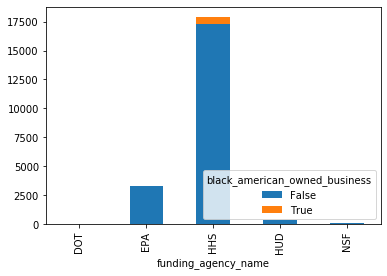

In [50]:
contracts.groupby(['funding_agency_name', 'black_american_owned_business']).size().unstack().plot(kind='bar',stacked=True)
plt.show()


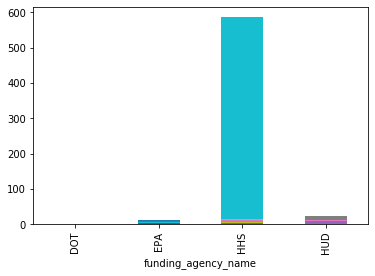

In [51]:
contracts[contracts['black_american_owned_business'] == True].groupby(['funding_agency_name', 'recipient_name'])[['contract_award_unique_key']].count().unstack().plot(kind='bar',stacked=True, legend=False)
plt.show()

In [52]:
len(contracts[contracts['black_american_owned_business'] == True]['recipient_name'].unique())

21

In [28]:
len(contracts['recipient_name'].unique())

1859

In [54]:
len(contracts[contracts['minority_owned_business'] == True]['recipient_name'].unique())

104